# Image segmentation task.

Korobov K.S. 3/18/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, filters, feature, measure
import pyclesperanto_prototype as cle
from scipy import ndimage as ndi
from scipy import stats
import napari
import pandas as pd

In [2]:
image_0 = io.imread('./images/marked/cropped_0.tif', as_gray=True)
fibers_0 = io.imread("./images/marked/mask_0.png", as_gray=True)

image_1 = io.imread('./images/marked/cropped_1.tif', as_gray=True)
fibers_1 = io.imread("./images/marked/mask_1.png", as_gray=True)

image_2 = io.imread('./images/marked/cropped_2.tif', as_gray=True)
fibers_2 = io.imread("./images/marked/mask_2.png", as_gray=True)

In [3]:
non_fibers_0 = ~fibers_0.astype(bool)
non_fibers_1 = ~fibers_1.astype(bool)
non_fibers_2 = ~fibers_2.astype(bool)

In [4]:
print("Image shape: ", image_0.shape)
print("Fibers shape: ", fibers_0.shape)
print("Non-fibers shape: ", non_fibers_0.shape)

Image shape:  (658, 1024)
Fibers shape:  (658, 1024)
Non-fibers shape:  (658, 1024)


In [5]:
print("Image shape: ", image_1.shape)
print("Fibers shape: ", fibers_1.shape)
print("Non-fibers shape: ", non_fibers_1.shape)

Image shape:  (658, 1024)
Fibers shape:  (658, 1024)
Non-fibers shape:  (658, 1024)


In [6]:
print("Image shape: ", image_2.shape)
print("Fibers shape: ", fibers_2.shape)
print("Non-fibers shape: ", non_fibers_2.shape)

Image shape:  (658, 1024)
Fibers shape:  (658, 1024)
Non-fibers shape:  (658, 1024)


In [7]:
pixel_length = 10 / 93 # 10 um in 93 pixels
pixel_area = pixel_length**2

# Print 3 decimal places
print(f"Pixel length: {pixel_length:.3f} um")
print(f"Pixel area: {pixel_area:.3f} um^2")

Pixel length: 0.108 um
Pixel area: 0.012 um^2


In [8]:
pixel_length_0 = 0.108516674
pixel_length_1 = 0.107481
pixel_length_2 = 0.107743103

pixel_area_0 = pixel_length_0**2
pixel_area_1 = pixel_length_1**2
pixel_area_2 = pixel_length_2**2

In [9]:
def plot_img(images, titles, cmap_name="gray"):
    fig, ax = plt.subplots(1, 3, figsize=(10, 6))
    ax[0].set_title(titles[0])
    ax[0].imshow(images[0], cmap=cmap_name)
    ax[1].set_title(titles[1])
    ax[1].imshow(images[1], cmap=cmap_name)
    ax[2].set_title(titles[2])
    ax[2].imshow(images[2], cmap=cmap_name)

def plot_one_img(image, title, cmap_name="gray"):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.imshow(image, cmap=cmap_name)

def plot_one2one(imageOne, imageTwo, titleOne, titleTwo, cmap_name="gray"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    # Turn off tick labels
    ax[0].set_title(titleOne)
    ax[0].imshow(imageOne, cmap=cmap_name)
    ax[1].set_title(titleTwo)
    ax[1].imshow(imageTwo, cmap=cmap_name)
    plt.tight_layout()

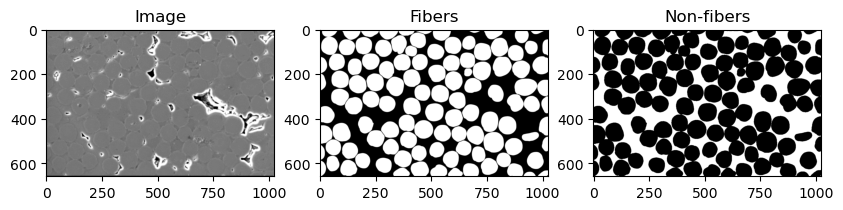

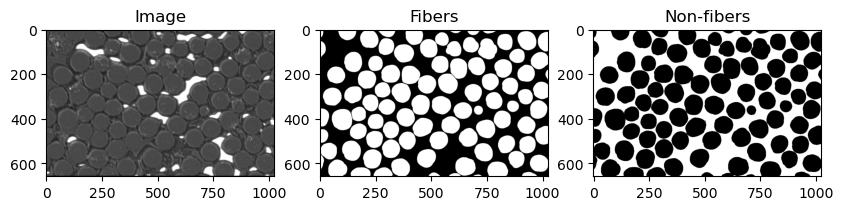

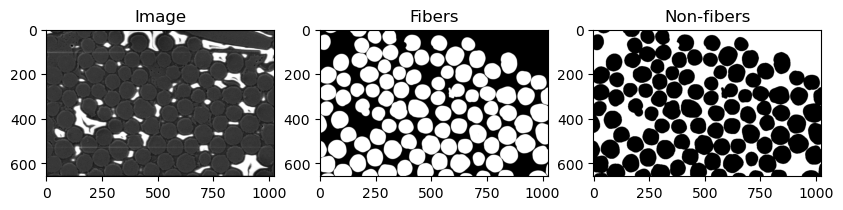

In [10]:
plot_img([image_0, fibers_0, non_fibers_0], ["Image", "Fibers", "Non-fibers"])

plot_img([image_1, fibers_1, non_fibers_1], ["Image", "Fibers", "Non-fibers"])

plot_img([image_2, fibers_2, non_fibers_2], ["Image", "Fibers", "Non-fibers"])

In [11]:
non_fibers_0_labels = measure.label(non_fibers_0)
non_fibers_1_labels = measure.label(non_fibers_1)
non_fibers_2_labels = measure.label(non_fibers_2)

non_fibers_0_props = measure.regionprops(non_fibers_0_labels)
non_fibers_1_props = measure.regionprops(non_fibers_1_labels)
non_fibers_2_props = measure.regionprops(non_fibers_2_labels)

areas_non_fibers_0 = [prop.area for prop in non_fibers_0_props]
areas_non_fibers_1 = [prop.area for prop in non_fibers_1_props]
areas_non_fibers_2 = [prop.area for prop in non_fibers_2_props]

non_fiber_area_0_um = sum(areas_non_fibers_0) * pixel_area_0
non_fiber_area_1_um = sum(areas_non_fibers_1) * pixel_area_1
non_fiber_area_2_um = sum(areas_non_fibers_2) * pixel_area_2

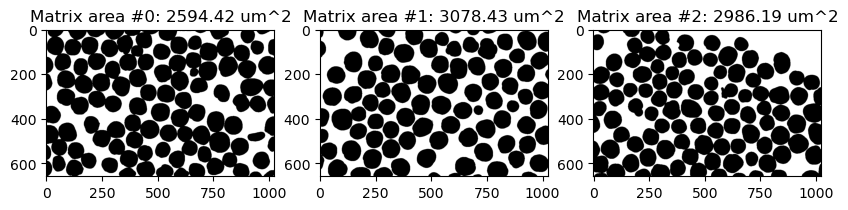

In [12]:
plot_img([non_fibers_0, non_fibers_1, non_fibers_2],\
         [f"Matrix area #0: {non_fiber_area_0_um:.2f} um^2",\
          f"Matrix area #1: {non_fiber_area_1_um:.2f} um^2",\
            f"Matrix area #2: {non_fiber_area_2_um:.2f} um^2"])

In [13]:
fibers_0_labels = measure.label(fibers_0 > 0.75)
fibers_1_labels = measure.label(fibers_1 > 0.75)
fibers_2_labels = measure.label(fibers_2 > 0.75)

fibers_0_labels_img = color.label2rgb(fibers_0_labels, bg_label=0)
fibers_1_labels_img = color.label2rgb(fibers_1_labels, bg_label=0)
fibers_2_labels_img = color.label2rgb(fibers_2_labels, bg_label=0)

In [14]:
fibers_area_0_all = sum([prop.area for prop in measure.regionprops(fibers_0_labels)])*pixel_area_0
fibers_area_1_all = sum([prop.area for prop in measure.regionprops(fibers_1_labels)])*pixel_area_1
fibers_area_2_all = sum([prop.area for prop in measure.regionprops(fibers_2_labels)])*pixel_area_2

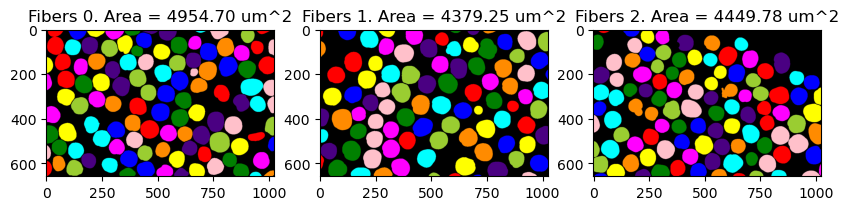

In [15]:
plot_img(
    [fibers_0_labels_img, fibers_1_labels_img, fibers_2_labels_img],\
    [f"Fibers 0. Area = {fibers_area_0_all:.2f} um^2", f"Fibers 1. Area = {fibers_area_1_all:.2f} um^2",\
     f"Fibers 2. Area = {fibers_area_2_all:.2f} um^2"]
)

In [16]:
cle.select_device("RTX")
fibers_labels_0_clean = cle.exclude_labels_on_edges(fibers_0_labels)
fibers_labels_1_clean = cle.exclude_labels_on_edges(fibers_1_labels)
fibers_labels_2_clean = cle.exclude_labels_on_edges(fibers_2_labels)

# Pull the data back to the CPU
fibers_labels_0_clean = fibers_labels_0_clean.get()
fibers_labels_1_clean = fibers_labels_1_clean.get()
fibers_labels_2_clean = fibers_labels_2_clean.get()

In [17]:
fibers_labels_0_clean_area = sum([prop.area for prop in measure.regionprops(fibers_labels_0_clean)])*pixel_area_0
fibers_labels_1_clean_area = sum([prop.area for prop in measure.regionprops(fibers_labels_1_clean)])*pixel_area_1
fibers_labels_2_clean_area = sum([prop.area for prop in measure.regionprops(fibers_labels_2_clean)])*pixel_area_2

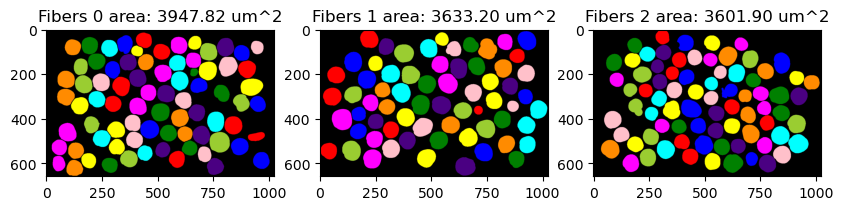

In [18]:
plot_img(
    [color.label2rgb(fibers_labels_0_clean),\
        color.label2rgb(fibers_labels_1_clean),\
        color.label2rgb(fibers_labels_2_clean)],\
    [f"Fibers 0 area: {fibers_labels_0_clean_area:.2f} um^2",\
        f"Fibers 1 area: {fibers_labels_1_clean_area:.2f} um^2",\
        f"Fibers 2 area: {fibers_labels_2_clean_area:.2f} um^2"]
)

In [19]:
fibers_0_props_table = pd.DataFrame(
    measure.regionprops_table(fibers_labels_0_clean,\
    properties=('label', 'area',\
                'equivalent_diameter_area',\
                    'eccentricity', 'centroid',\
                        'axis_major_length',\
                            'axis_minor_length'))
)

fibers_1_props_table = pd.DataFrame(
    measure.regionprops_table(fibers_labels_1_clean,\
    properties=('label', 'area',\
                'equivalent_diameter_area',\
                    'eccentricity', 'centroid',\
                        'axis_major_length',\
                            'axis_minor_length'))
)

fibers_2_props_table = pd.DataFrame(
    measure.regionprops_table(fibers_labels_2_clean,\
    properties=('label', 'area',\
                'equivalent_diameter_area',\
                    'eccentricity', 'centroid',\
                        'axis_major_length',\
                            'axis_minor_length'))
)

In [20]:
# Rename centroid-0 and centroid-1 to y and x

fibers_0_props_table.rename(columns={'centroid-0': 'y',\
                                        'centroid-1': 'x'},\
                                        inplace=True)

fibers_1_props_table.rename(columns={'centroid-0': 'y',\
                                        'centroid-1': 'x'},\
                                        inplace=True)

fibers_2_props_table.rename(columns={'centroid-0': 'y',\
                                        'centroid-1': 'x'},\
                                        inplace=True)

In [21]:
fibers_0_props_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   label                     77 non-null     int32  
 1   area                      77 non-null     int32  
 2   equivalent_diameter_area  77 non-null     float64
 3   eccentricity              77 non-null     float64
 4   y                         77 non-null     float64
 5   x                         77 non-null     float64
 6   axis_major_length         77 non-null     float64
 7   axis_minor_length         77 non-null     float64
dtypes: float64(6), int32(2)
memory usage: 4.3 KB


In [22]:
# fibers_0_props_table['area'] to float
fibers_0_props_table['area'] = fibers_0_props_table['area'].astype(float)
fibers_1_props_table['area'] = fibers_1_props_table['area'].astype(float)
fibers_2_props_table['area'] = fibers_2_props_table['area'].astype(float)

In [23]:
# Draw circles at the fibers_0_props_table['x'], fibers_0_props_table['y']
# with radius ['equivalent_diameter_area'] / 2
def draw_circles(image, props_table, original_image, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.imshow(original_image, cmap='gray', alpha=0.85)
    plt.imshow(color.label2rgb(measure.label(image))\
               , alpha=0.5)
    plt.scatter(props_table['x'], props_table['y'], c='r', alpha=0.5)
    for i in range(len(props_table)):
        plt.gca().add_patch(plt.Circle((props_table['x'][i], props_table['y'][i]),\
                                       radius=props_table['equivalent_diameter_area'][i] / 2,\
                                        color='r', fill=False, linewidth=2, alpha=0.8))
    plt.show()

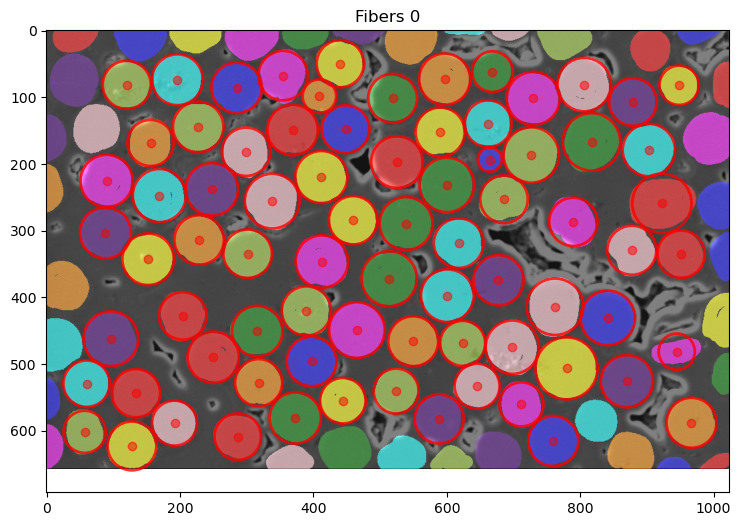

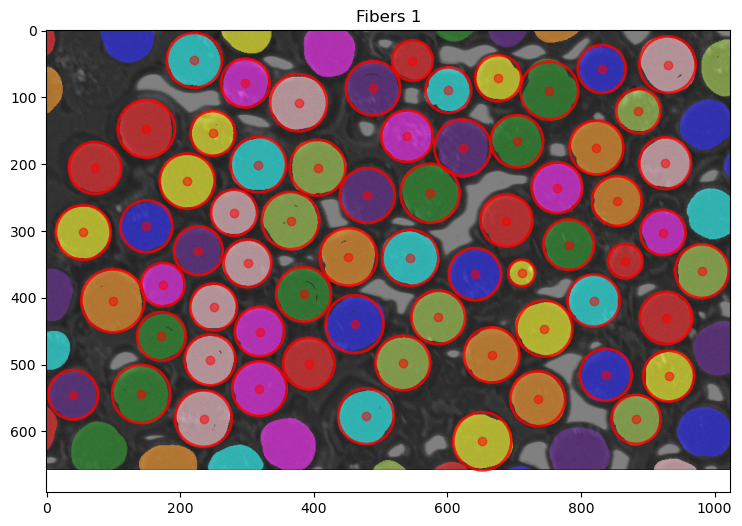

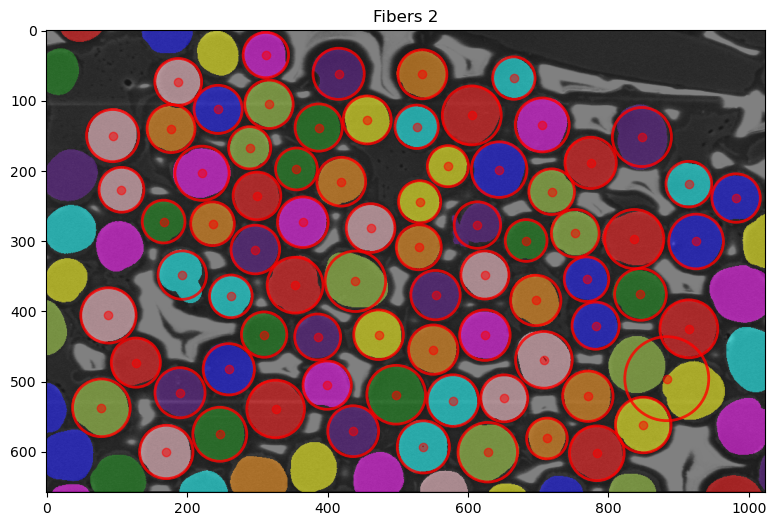

In [24]:
draw_circles(fibers_0, fibers_0_props_table, image_0, title="Fibers 0")
draw_circles(fibers_1, fibers_1_props_table, image_1, title="Fibers 1")
draw_circles(fibers_2, fibers_2_props_table, image_2, title="Fibers 2")

In [25]:
# Convert all pixel values to um
def convert_to_um(props_table, pixel_area, pixel_length):
    props_table['area'] = props_table['area'] * pixel_area
    props_table['equivalent_diameter_area'] = props_table['equivalent_diameter_area']\
        * pixel_length
    props_table['x'] = props_table['x'] * pixel_length
    props_table['y'] = props_table['y'] * pixel_length

In [26]:
convert_to_um(fibers_0_props_table, pixel_area_0, pixel_length_0)
convert_to_um(fibers_1_props_table, pixel_area_1, pixel_length_1)
convert_to_um(fibers_2_props_table, pixel_area_2, pixel_length_2)

In [27]:
fibers_1_props_table.head()

,label,area,equivalent_diameter_area,eccentricity,y,x,axis_major_length,axis_minor_length
0,1,61.226476,8.829268,0.403511,4.777612,23.757681,85.947224,78.639532
1,2,64.622813,9.070850,0.505147,5.468696,99.899958,90.894468,78.444933
2,3,33.027641,6.484759,0.318991,4.824352,58.855979,62.048404,58.806851
3,4,46.543674,7.698133,0.389757,6.161204,89.302866,74.735230,68.825007
4,5,43.193546,7.415911,0.437491,7.661363,72.647009,72.964823,65.611644


In [44]:
# Export the data to a xls file
writer = pd.ExcelWriter('fibers_props_table.xlsx')
fibers_0_props_table.to_excel(writer, sheet_name='fibers_0')
fibers_1_props_table.to_excel(writer, sheet_name='fibers_1')
fibers_2_props_table.to_excel(writer, sheet_name='fibers_2')
writer.save()

C:\TMP\ipykernel_7448\3642840786.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [28]:
image_0_area_um = image_0.shape[0] * image_0.shape[1] * pixel_area_0
image_1_area_um = image_1.shape[0] * image_1.shape[1] * pixel_area_1
image_2_area_um = image_2.shape[0] * image_2.shape[1] * pixel_area_2

deleted_fiber_0_area_um = fibers_area_0_all - fibers_labels_0_clean_area
deleted_fiber_1_area_um = fibers_area_1_all - fibers_labels_1_clean_area
deleted_fiber_2_area_um = fibers_area_2_all - fibers_labels_2_clean_area

In [29]:
print(f"Image_0 area: {image_0_area_um:.2f} um^2")
print(f"Image_1 area: {image_1_area_um:.2f} um^2")
print(f"Image_2 area: {image_2_area_um:.2f} um^2")

Image_0 area: 7934.49 um^2
Image_1 area: 7783.76 um^2
Image_2 area: 7821.77 um^2


In [30]:
print(f"Total fiber_0 area: {fibers_area_0_all:.2f} um^2")
print(f"Total fiber_1 area: {fibers_area_1_all:.2f} um^2")
print(f"Total fiber_2 area: {fibers_area_2_all:.2f} um^2")

Total fiber_0 area: 4954.70 um^2
Total fiber_1 area: 4379.25 um^2
Total fiber_2 area: 4449.78 um^2


In [31]:
print(f"Total non-fiber_0 area: {non_fiber_area_0_um:.2f} um^2")
print(f"Total non-fiber_1 area: {non_fiber_area_1_um:.2f} um^2")
print(f"Total non-fiber_2 area: {non_fiber_area_2_um:.2f} um^2")

Total non-fiber_0 area: 2594.42 um^2
Total non-fiber_1 area: 3078.43 um^2
Total non-fiber_2 area: 2986.19 um^2


In [32]:
print(f"Clean fiber_0 area: {fibers_labels_0_clean_area:.2f} um^2")
print(f"Clean fiber_1 area: {fibers_labels_1_clean_area:.2f} um^2")
print(f"Clean fiber_2 area: {fibers_labels_2_clean_area:.2f} um^2")

Clean fiber_0 area: 3947.82 um^2
Clean fiber_1 area: 3633.20 um^2
Clean fiber_2 area: 3601.90 um^2


In [33]:
print(f"Deleted fiber_0 area: {deleted_fiber_0_area_um:.2f} um^2")
print(f"Deleted fiber_1 area: {deleted_fiber_1_area_um:.2f} um^2")
print(f"Deleted fiber_2 area: {deleted_fiber_2_area_um:.2f} um^2")

Deleted fiber_0 area: 1006.87 um^2
Deleted fiber_1 area: 746.05 um^2
Deleted fiber_2 area: 847.88 um^2


In [34]:
print(f"Fibers packege density_0: {fibers_area_0_all / image_0_area_um*100:.3f}%")
print(f"Fibers packege density_1: {fibers_area_1_all / image_1_area_um*100:.3f}%")
print(f"Fibers packege density_2: {fibers_area_2_all / image_2_area_um*100:.3f}%")

Fibers packege density_0: 62.445%
Fibers packege density_1: 56.261%
Fibers packege density_2: 56.890%


In [35]:
print(f"Matrix packing density_0: {non_fiber_area_0_um/ image_0_area_um*100:.3f}%")
print(f"Matrix packing density_1: {non_fiber_area_1_um/ image_1_area_um*100:.3f}%")
print(f"Matrix packing density_2: {non_fiber_area_2_um/ image_2_area_um*100:.3f}%")

Matrix packing density_0: 32.698%
Matrix packing density_1: 39.549%
Matrix packing density_2: 38.178%


In [36]:
print(
    (fibers_area_0_all + non_fiber_area_0_um) / image_0_area_um,

(fibers_area_1_all + non_fiber_area_1_um) / image_1_area_um,

(fibers_area_2_all + non_fiber_area_2_um) / image_2_area_um
)

0.9514315990691489 0.9581087338525837 0.9506761730623101


In [37]:
mean_diam_0 = fibers_0_props_table['equivalent_diameter_area'].mean()
mean_diam_1 = fibers_1_props_table['equivalent_diameter_area'].mean()
mean_diam_2 = fibers_2_props_table['equivalent_diameter_area'].mean()

print(
    f"Mean fiber diameter #0: {mean_diam_0:.3f} um")
print(
    f"Mean fiber diameter #1: {mean_diam_1:.3f} um")
print(
    f"Mean fiber diameter #2: {mean_diam_2:.3f} um")


Mean fiber diameter #0: 8.031 um
Mean fiber diameter #1: 8.320 um
Mean fiber diameter #2: 7.706 um


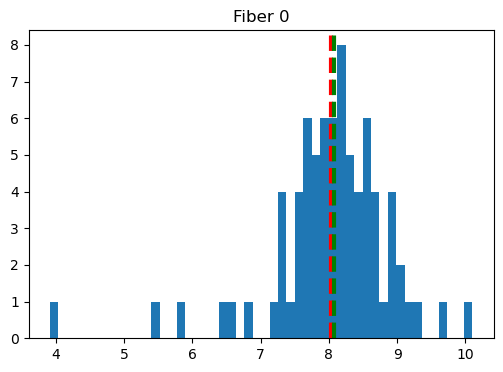

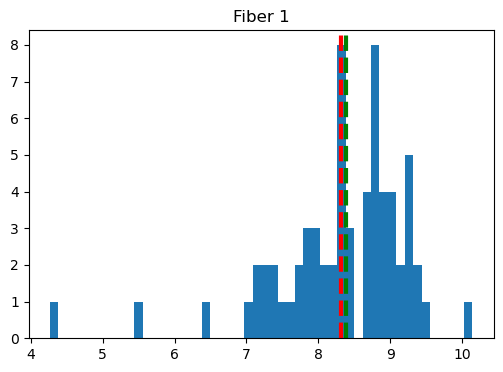

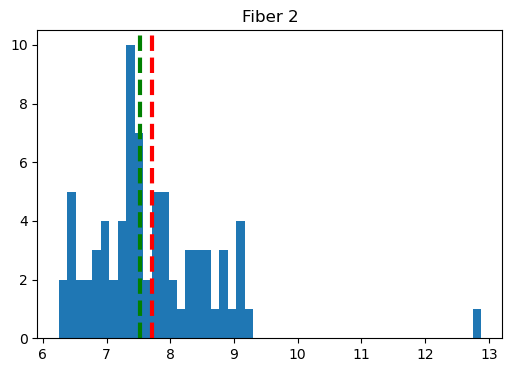

In [38]:
# Plot hist of fiber diameters
def plot_hist(props_table, title):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    # Plot mean and median diams as a vertical line
    plt.axvline(props_table['equivalent_diameter_area'].mean(),\
                color='r', linestyle='dashed', linewidth=3)
    plt.axvline(props_table['equivalent_diameter_area'].median(),\
                color='g', linestyle='dashed', linewidth=3)
    plt.hist(props_table['equivalent_diameter_area'], bins=50)
    plt.show()

plot_hist(fibers_0_props_table, title="Fiber 0")
plot_hist(fibers_1_props_table, title="Fiber 1")
plot_hist(fibers_2_props_table, title="Fiber 2")

In [39]:
# Calculate standard deviation of fiber diameters
def calc_std(props_table):
    print(f"Standard deviation of fiber diameters:\
            {props_table['equivalent_diameter_area'].std():.3f} um")


std_0 = calc_std(fibers_0_props_table)
std_1 = calc_std(fibers_1_props_table)
std_2 = calc_std(fibers_2_props_table)

Standard deviation of fiber diameters:            0.886 um
Standard deviation of fiber diameters:            0.939 um
Standard deviation of fiber diameters:            0.985 um


In [40]:
# Function to calculate the 95% confidence interval of the mean fiber diameter
def calc_conf_int(props_table, percent=0.95):
    mean_diam = props_table['equivalent_diameter_area'].mean()
    sem = stats.sem(props_table['equivalent_diameter_area'])
    print(f"Standard error of the mean: {sem:.3f} um")
    # Calculate the confidence interval
    conf_int = stats.t.interval(percent,len(props_table['equivalent_diameter_area']) - 1,\
                                loc=mean_diam, scale=sem)
    print(
        f"95% confidence interval of the mean fiber diameter:\
            {conf_int[0]:.3f} um - {conf_int[1]:.3f} um"
    )

In [41]:
calc_conf_int(fibers_0_props_table)
calc_conf_int(fibers_1_props_table)
calc_conf_int(fibers_2_props_table)

Standard error of the mean: 0.101 um
95% confidence interval of the mean fiber diameter:            7.830 um - 8.233 um
Standard error of the mean: 0.116 um
95% confidence interval of the mean fiber diameter:            8.089 um - 8.551 um
Standard error of the mean: 0.113 um
95% confidence interval of the mean fiber diameter:            7.481 um - 7.931 um
